In [130]:
import pandas as pd

**Load Data**

In [131]:
data = pd.read_csv("train.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [132]:
test = pd.read_csv("test.csv")
test_id = test['PassengerId']

In [133]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [134]:
data.set_index(data.PassengerId, inplace = True)

In [135]:
data.drop("PassengerId", axis = 1, inplace = True)

In [136]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Feature Classification**

In [137]:
features = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

def convert_category(data, features):
  for feature in features:
    data[feature] = data[feature].astype('category')
  return data

In [138]:
convert_category(data, features)
convert_category(test, features)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [139]:
data['Survived'] = data['Survived'].astype('category')

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


**Data Distribution**

In [141]:
data.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [142]:
data.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# **EXPLORATORY DATA ANALYSIS**

## **Target variable: Survived**

In [143]:
data['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

## **Sex**

In [144]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Survived', ylabel='count'>

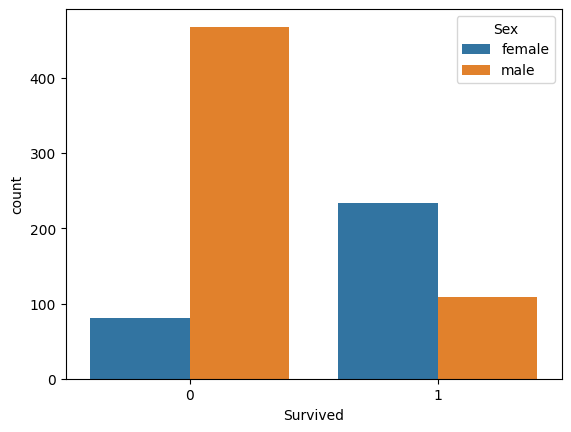

In [146]:
sns.countplot(x = "Survived", data = data, hue = "Sex")

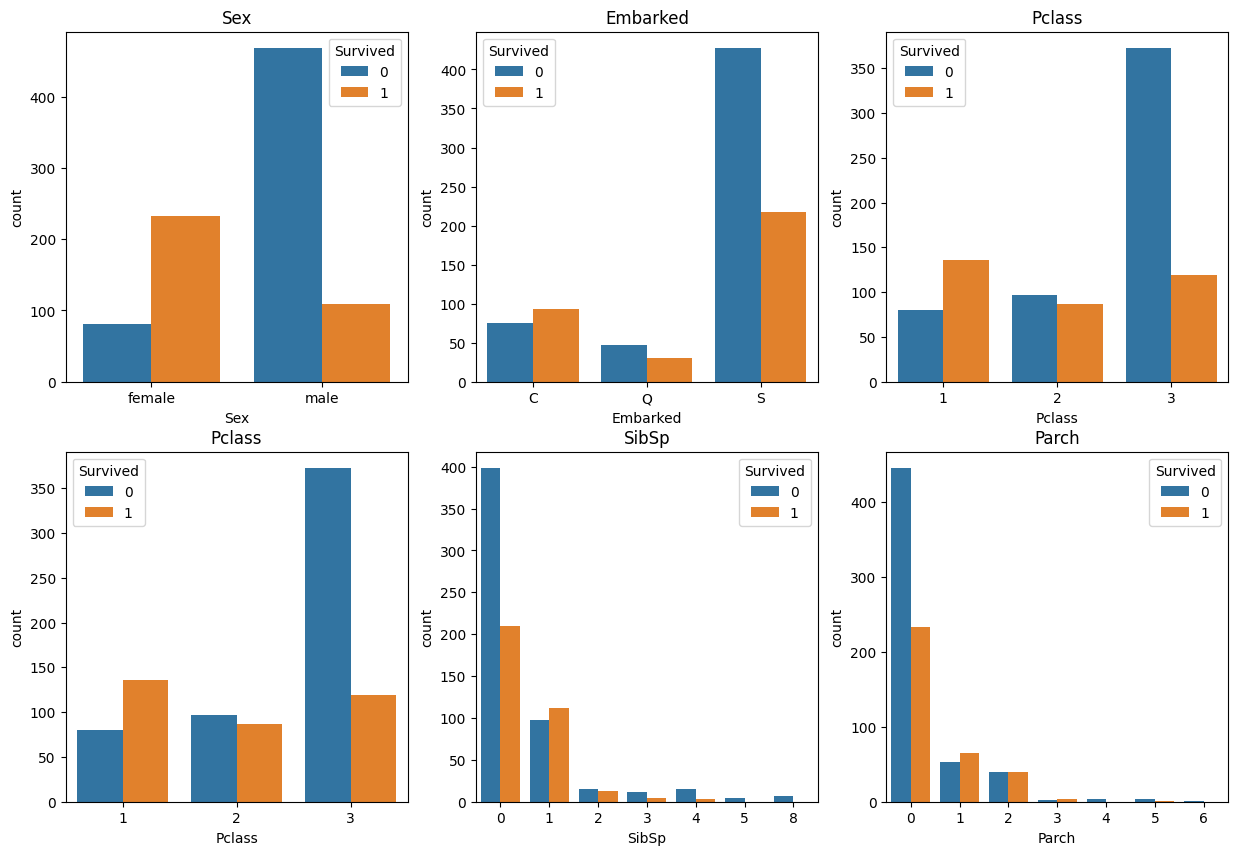

In [147]:
features = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']
n_rows = 2
n_cols = 3
fig, ax = plt.subplots(2,3, figsize=(15,10))
for row in range(0, n_rows):
  for col in range(0, n_cols):
    i = row*n_rows + col
    if i < len(features):
      _ax = ax[row, col]
      sns.countplot(hue = "Survived", data = data, x = features[i], ax = _ax)
      _ax.set_title(features[i])
plt.show()


## **Age**

<Axes: xlabel='Age', ylabel='Count'>

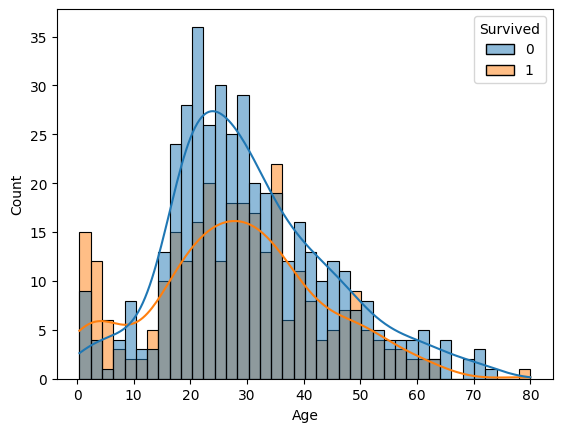

In [148]:
sns.histplot(data = data, x = 'Age', hue = 'Survived', bins = 40, kde = True)

## **Fare**

In [149]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

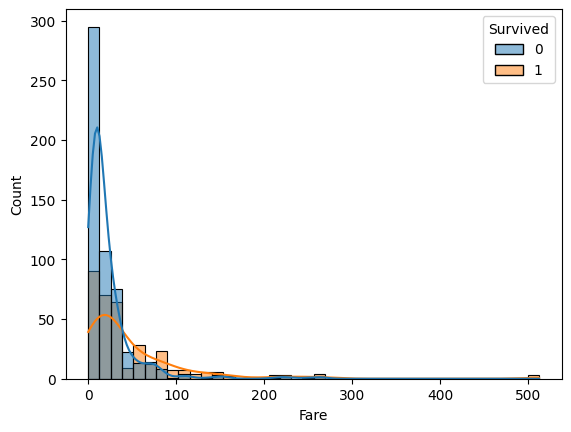

In [150]:
sns.histplot(x = 'Fare', data = data, hue = 'Survived', bins = 40, kde = True )

In [151]:
#pd.qcut

In [152]:
fare_categories = ['Cheap', 'Standard', 'Expensive', 'Luxury']
fare_qcut_data = pd.qcut(data['Fare'], 4, labels = fare_categories)

<Axes: xlabel='Fare', ylabel='count'>

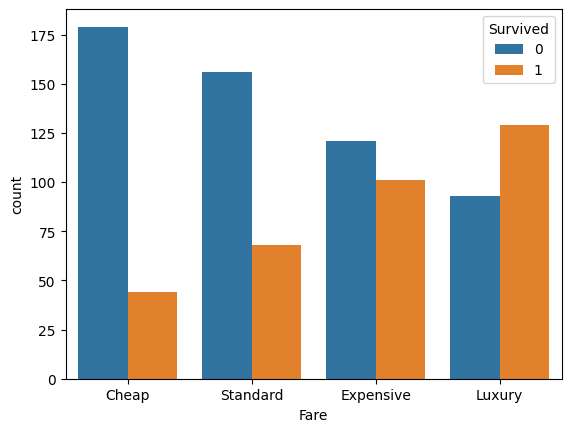

In [153]:
sns.countplot(x = fare_qcut_data, hue = data['Survived'] )

# **Feature Engineering and Data Wrangling**

##**Name**

In [154]:
data['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [155]:
import re
def extract_title(name):
  p = re.compile(r", ([\w\s]+)\.")
  return p.search(name).groups(1)[0].strip()

data['Title'] = data['Name'].apply(lambda name: extract_title(name))
test['Title'] = test['Name'].apply(lambda name: extract_title(name))
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [156]:
data['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [157]:
def group_title(title):
  if title in ['Mr', 'Miss', 'Mrs', 'Master']:
    return title
  elif title == 'Ms':
    return 'Miss'
  else:
    return 'Others'
data['Title'] = data['Title'].apply(lambda title: group_title(title))
test['Title'] = test['Title'].apply(lambda title: group_title(title))

<Axes: xlabel='Title', ylabel='count'>

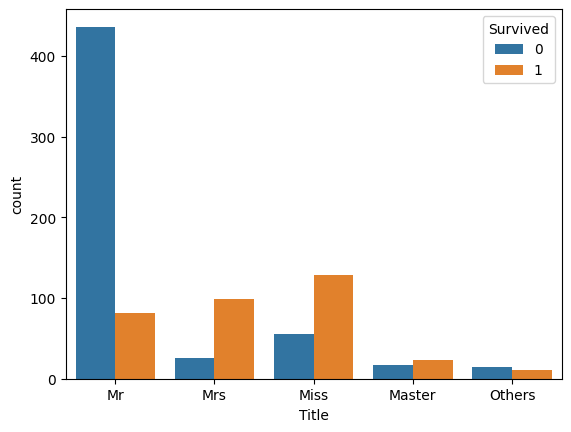

In [158]:
sns.countplot(x='Title', data=data, hue = 'Survived')

##**Family**

###Sibsp, Parch

In [159]:
data['Family_size'] = data['SibSp'].astype('int') + data['Parch'].astype('int') + 1
test['Family_size'] = test['SibSp'].astype('int') + test['Parch'].astype('int') + 1

<Axes: xlabel='Family_size', ylabel='count'>

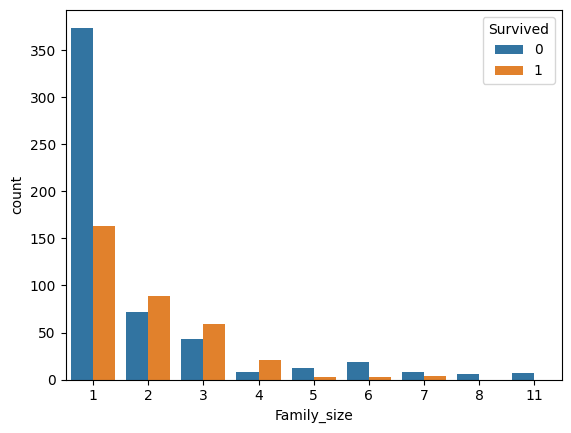

In [160]:
sns.countplot(x = 'Family_size', data = data, hue = 'Survived')

In [161]:
data['Family_category'] = pd.cut(data['Family_size'], bins =[0,1,4,6,20], labels = ['Solo', 'Small','Medium', 'Big'])
test['Family_category'] = pd.cut(test['Family_size'], bins =[0,1,4,6,20], labels = ['Solo', 'Small','Medium', 'Big'])

<Axes: xlabel='Family_category', ylabel='count'>

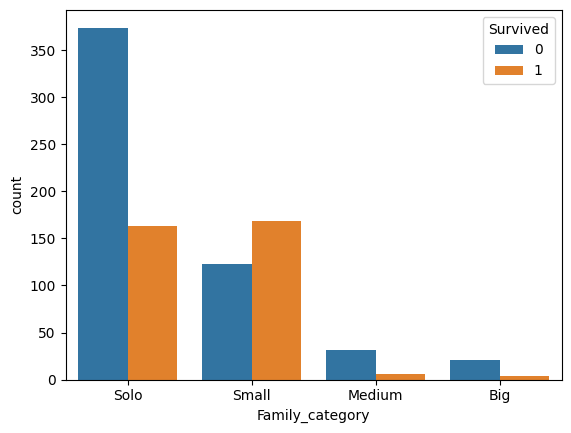

In [162]:
sns.countplot(x = 'Family_category', data = data, hue = 'Survived')

##**Data Wrangling**

In [163]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_category']
features_cols = num_features + cat_features
print(features_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_category']


###**Missing Data**

In [164]:
data.isna().sum()

Survived             0
Pclass               0
Name                 0
Sex                  0
Age                177
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
Title                0
Family_size          0
Family_category      0
dtype: int64

In [165]:
test.isna().sum()

PassengerId          0
Pclass               0
Name                 0
Sex                  0
Age                 86
SibSp                0
Parch                0
Ticket               0
Fare                 1
Cabin              327
Embarked             0
Title                0
Family_size          0
Family_category      0
dtype: int64

<Axes: ylabel='PassengerId'>

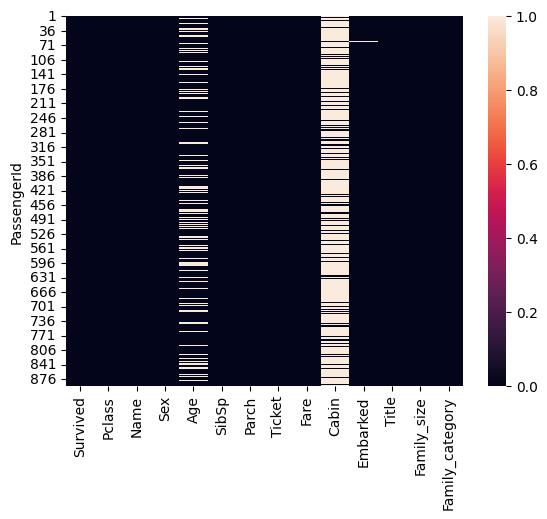

In [166]:
sns.heatmap(data.isna())

###Fill missing data
-Age


In [167]:
age_by_sex_pclass = data.groupby(['Sex', 'Pclass']).median()['Age']

<ipython-input-167-12d3eba0b3fa>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_by_sex_pclass = data.groupby(['Sex', 'Pclass']).median()['Age']


In [168]:
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [169]:
data['Age'] = data.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
test['Age'] = test.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

<ipython-input-169-cb0cc6ca65b8>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data['Age'] = data.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
<ipython-input-169-cb0cc6ca65b8>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  test['Age'] = test.groupby(['Sex', 'Pclas

In [170]:
data.isna().sum()

Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
Title                0
Family_size          0
Family_category      0
dtype: int64

In [171]:
X = data[features_cols]
y = data['Survived']


In [172]:
X_test = test[features_cols]

#**Data preprocessing**

In [173]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_transfomer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transfomer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [174]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transfomer, num_features),
    ('cat', cat_transfomer, cat_features),
])

In [175]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_category'])])

In [176]:
X = preprocessor.transform(X)

In [177]:
X_test = preprocessor.transform(X_test)

In [180]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

#**LogisticRegression**

In [181]:
from sklearn.linear_model import LogisticRegression

In [182]:
clf = LogisticRegression(solver = 'liblinear', random_state = 0, max_iter = 1000).fit(X_train, y_train)

In [183]:
clf.score(X_val, y_val)

0.8659217877094972

In [184]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

pred = clf.predict(X_val)
accuracy_score(y_val, pred)

0.8659217877094972

In [185]:
sub_pred = clf.predict(X_test)
df = pd.DataFrame({
    "PassengerId": test_id.values,
    "Survived": sub_pred,
})

df.to_csv("submission_clf.csv", index=False)

#**RandomForest - ID3**

In [186]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rfc.fit(X_train, y_train)
rfc_prediction = rfc.predict(X_val)

print(accuracy_score(y_val, rfc_prediction))

0.8435754189944135


In [187]:
sub_pred_id3 = rfc.predict(X_test)
df = pd.DataFrame({
    "PassengerId": test_id.values,
    "Survived": sub_pred_id3,
})

df.to_csv("submission_rf.csv", index=False)

In [192]:
res = pd.read_csv('submission_clf.csv', header = None)
res

,0,1
0,PassengerId,Survived
1,892,0
2,893,1
3,894,0
4,895,0
...,...,...
414,1305,0
415,1306,1
416,1307,0
417,1308,0


In [191]:
res1 = pd.read_csv('gender_submission.csv', header = None)
res

,0,1
0,PassengerId,Survived
1,892,0
2,893,1
3,894,0
4,895,0
...,...,...
414,1305,0
415,1306,1
416,1307,0
417,1308,0


In [199]:
print(accuracy_score(res1[1], res[1]))

0.9284009546539379
